In [1]:
from sklearn import svm
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("MAD_III")

In [2]:
data = pd.read_csv("data/nonsep.csv",header=None,sep=';')
data.shape

(140, 3)

In [3]:
def generate_colors(indices):
    colors = []
    for cId in indices:
        if cId == 1:
            colors.append("red")
        else:
            colors.append("blue")
    return colors
def generate_wrong_colors(predicted, gt):
    assert len(predicted) == len(gt)
    colors = ["white" if gt[i] == predicted[i] else "red" for i in range(len(gt))]
    return colors

In [48]:
X = list(data[0])
Y = list(data[1])
svmInput = [ [data[0][row], data[1][row]] for row in range(len(data))]
GT = list(data[2])
colors = generate_colors(GT)

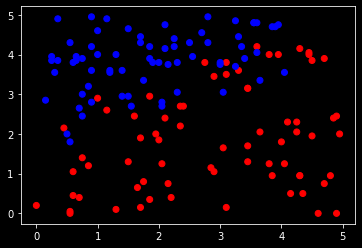

In [49]:
plt.scatter(X,Y,c=colors)

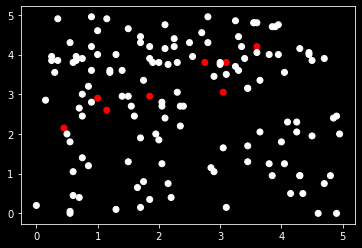

In [78]:
clf = svm.SVC(gamma='scale',kernel='rbf',C=10000)
clf.fit(svmInput, GT)
predicted = clf.predict(svmInput)
plt.scatter(X,Y,c=generate_wrong_colors(predicted, GT))

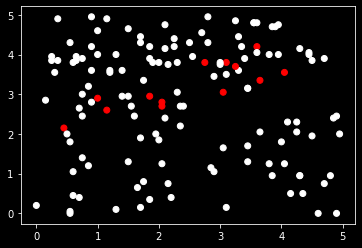

In [74]:
clf = svm.SVC(gamma='scale',kernel='linear',C=10000)
clf.fit(svmInput, GT)
predicted = clf.predict(svmInput)
plt.scatter(X,Y,c=generate_wrong_colors(predicted, GT))

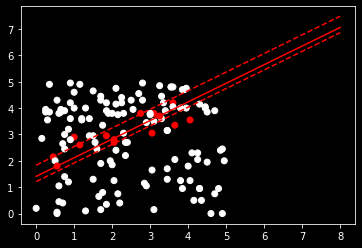

In [25]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 8)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.scatter(X,Y,c=generate_wrong_colors(predicted, GT))
plt.plot(xx, yy, 'r-')
plt.plot(xx, yy_down, 'r--')
plt.plot(xx, yy_up, 'r--')

In [47]:
k = 4
kFold = KFold(n_splits=k,shuffle=False)
dataset = kFold.split(data)

benchmark = []
splitDataset = []

for trainIndices,testIndices in kFold.split(data):
    splitDataset.append({
        "train": [[data[0][rowIndex], data[1][rowIndex]] for rowIndex in trainIndices],
        "test": [[data[0][rowIndex], data[1][rowIndex]] for rowIndex in testIndices],
        "trainGT": [data[2][rowIndex] for rowIndex in trainIndices],
        "testGT": [data[2][rowIndex] for rowIndex in testIndices]
    })

for kf in range(k):
    kFoldResult = {"Index": kf, "KernelInfo": []}
    for _kernel in ['linear','rbf','sigmoid']:
        kernelResult = {"Kernel": _kernel, "CostPrecision": []}
        for cost in [1,100,1000,10000]:
            svmPredictor = svm.SVC(kernel=_kernel,gamma='scale',C=cost)
            svmPredictor.fit(splitDataset[kf]["train"], splitDataset[kf]["trainGT"])
            predictedLabels = svmPredictor.predict(splitDataset[kf]["test"])
            correct = sum([ splitDataset[kf]["testGT"][x] == predictedLabels[x] for x in range(len(splitDataset[kf]["test"]))])
            precision = float(correct) / len(splitDataset[kf]["testGT"])
            kernelResult["CostPrecision"].append({ "Cost": cost, "Precision": precision })
            #kernelResult["precision"].append(precision)

            _x = [x[0] for x in splitDataset[kf]["test"]]
            _y = [x[1] for x in splitDataset[kf]["test"]]
            
            # if kf == 0:
            #     plt.title(f"Kernel={_kernel} c={cost} precision={precision}")
            #     plt.scatter(_x,_y,c=generate_wrong_colors(predictedLabels, splitDataset[kf]["testGT"]))
            #     plt.show()

        
        kFoldResult["KernelInfo"].append(kernelResult)

    benchmark.append(kFoldResult)
benchmark

[{'Index': 0,
  'KernelInfo': [{'Kernel': 'linear',
    'CostPrecision': [{'Cost': 1, 'Precision': 1.0},
     {'Cost': 100, 'Precision': 1.0},
     {'Cost': 1000, 'Precision': 1.0},
     {'Cost': 10000, 'Precision': 1.0}]},
   {'Kernel': 'rbf',
    'CostPrecision': [{'Cost': 1, 'Precision': 1.0},
     {'Cost': 100, 'Precision': 0.8857142857142857},
     {'Cost': 1000, 'Precision': 0.8571428571428571},
     {'Cost': 10000, 'Precision': 0.8285714285714286}]},
   {'Kernel': 'sigmoid',
    'CostPrecision': [{'Cost': 1, 'Precision': 0.02857142857142857},
     {'Cost': 100, 'Precision': 0.9714285714285714},
     {'Cost': 1000, 'Precision': 1.0},
     {'Cost': 10000, 'Precision': 1.0}]}]},
 {'Index': 1,
  'KernelInfo': [{'Kernel': 'linear',
    'CostPrecision': [{'Cost': 1, 'Precision': 1.0},
     {'Cost': 100, 'Precision': 1.0},
     {'Cost': 1000, 'Precision': 1.0},
     {'Cost': 10000, 'Precision': 1.0}]},
   {'Kernel': 'rbf',
    'CostPrecision': [{'Cost': 1, 'Precision': 1.0},
     {'Cos

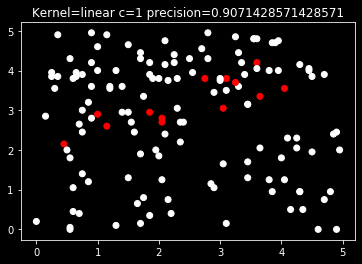

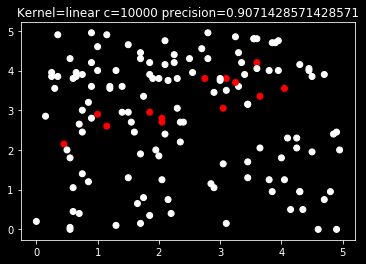

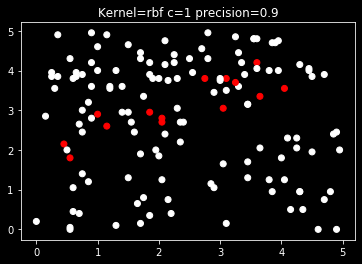

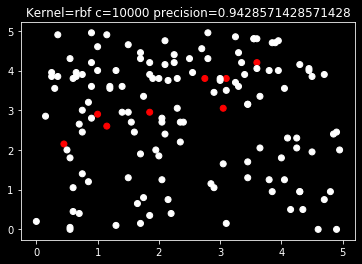

In [46]:
svmInput = [ [data[0][row], data[1][row]] for row in range(len(data))]
for _kernel in ['linear','rbf']:
    for cost in [1,10000]:
        svmPredictor = svm.SVC(kernel=_kernel,gamma='scale',C=cost)
        svmPredictor.fit(svmInput, GT)
        predictedLabels = svmPredictor.predict(svmInput)
        correct = sum([ GT[x] == predictedLabels[x] for x in range(len(svmInput))])
        precision = float(correct) / len(svmInput)

        # _x = [x[0] for x in splitDataset[kf]["test"]]
        # _y = [x[1] for x in splitDataset[kf]["test"]]
        
        plt.title(f"Kernel={_kernel} c={cost} precision={precision}")
        plt.scatter(X,Y,c=generate_wrong_colors(predictedLabels, GT))
        plt.show()

In [70]:
iris = pd.read_csv("data/iris.csv",header=None,sep=';')
iris.shape
irisInput = [[iris[0][x],iris[1][x],iris[2][x],iris[3][x]] for x in range(len(iris))]
irisGT = [iris[4][x] for x in range(len(iris))]

irisSVM = svm.SVC(gamma='scale',kernel='linear')
irisSVM.fit(irisInput, irisGT)
irisPredicted = irisSVM.predict(irisInput)

correct = sum([ irisGT[x] == irisPredicted[x] for x in range(len(irisInput))])
precision = float(correct) / len(irisInput)
print(precision)


0.9933333333333333
